In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Q1

In [95]:
import pandas as pd
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',header=None, names=headers, na_values="?" )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [96]:
df['engine_type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

## Q2

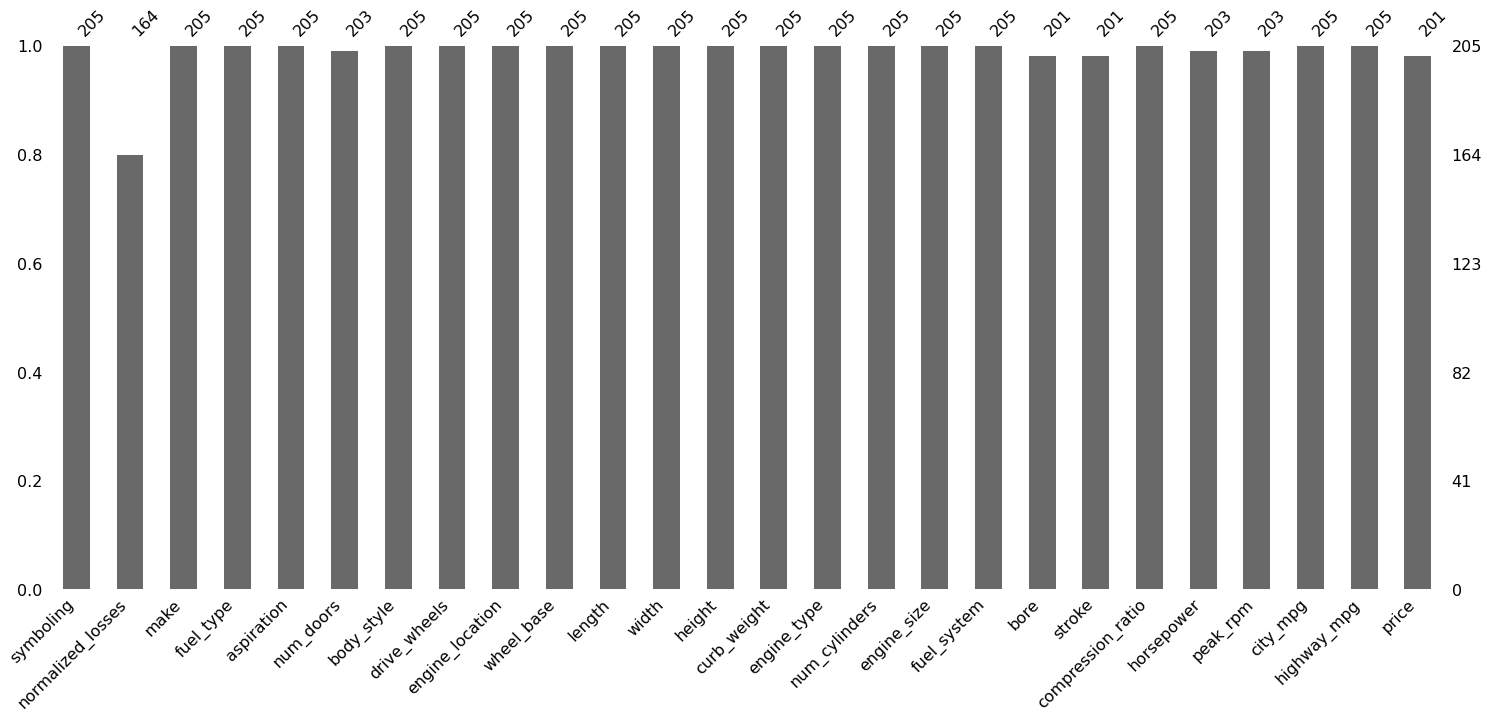

In [97]:
import missingno as msn
msn.bar(df)

In [98]:
import numpy as np
from sklearn.impute import SimpleImputer
mean_imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
df[["normalized_losses"]]=mean_imputer.fit_transform(df[["normalized_losses"]])
df[["bore"]]=mean_imputer.fit_transform(df[["bore"]])
df[["stroke"]]=mean_imputer.fit_transform(df[["stroke"]])
df[["peak_rpm"]]=mean_imputer.fit_transform(df[["peak_rpm"]])
df[["city_mpg"]]=mean_imputer.fit_transform(df[["city_mpg"]])
df[["horsepower"]]=mean_imputer.fit_transform(df[["horsepower"]])

mode_imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df[["num_doors"]]=mode_imputer.fit_transform(df[["num_doors"]])
df= df.dropna(subset=['price'])

## Q3 

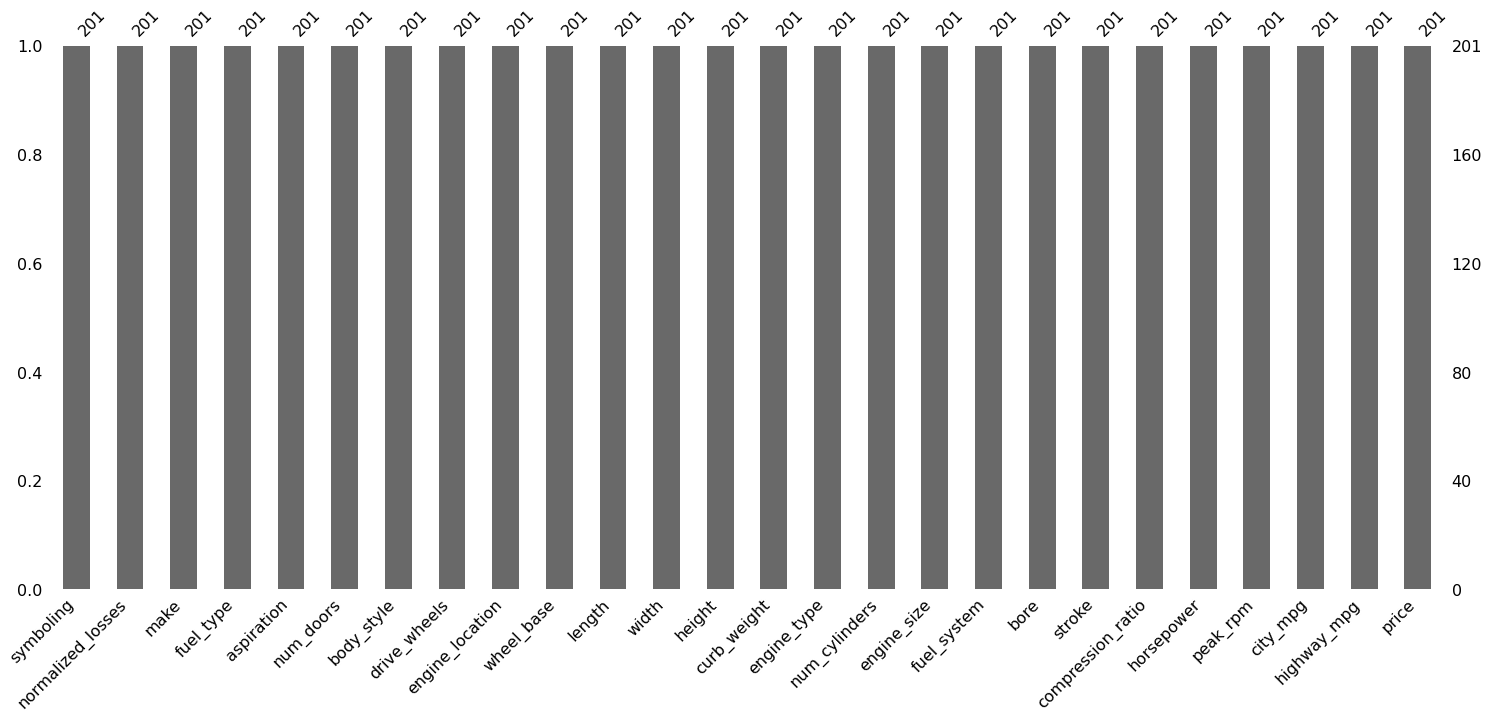

In [99]:
msn.bar(df)

### (i)

In [100]:
cleanup_nums = {"num_doors":     {"four": 4, "two": 2},
                "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
df = df.replace(cleanup_nums)


### (ii)

In [101]:
df=pd.get_dummies(df, columns=["body_style", "drive_wheels"], prefix=["body", "drive"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_doors          201 non-null    int64  
 6   engine_location    201 non-null    object 
 7   wheel_base         201 non-null    float64
 8   length             201 non-null    float64
 9   width              201 non-null    float64
 10  height             201 non-null    float64
 11  curb_weight        201 non-null    int64  
 12  engine_type        201 non-null    object 
 13  num_cylinders      201 non-null    int64  
 14  engine_size        201 non-null    int64  
 15  fuel_system        201 non-null    object 
 16  bore               201 non

### (iii)

In [102]:
from sklearn.preprocessing import LabelEncoder

ord_enc = LabelEncoder()
df["make"] = ord_enc.fit_transform(df[["make"]])
df["aspiration"] = ord_enc.fit_transform(df[["aspiration"]])
df["engine_location"] = ord_enc.fit_transform(df[["engine_location"]])
df["fuel_type"] = ord_enc.fit_transform(df[["fuel_type"]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   make               201 non-null    int64  
 3   fuel_type          201 non-null    int64  
 4   aspiration         201 non-null    int64  
 5   num_doors          201 non-null    int64  
 6   engine_location    201 non-null    int64  
 7   wheel_base         201 non-null    float64
 8   length             201 non-null    float64
 9   width              201 non-null    float64
 10  height             201 non-null    float64
 11  curb_weight        201 non-null    int64  
 12  engine_type        201 non-null    object 
 13  num_cylinders      201 non-null    int64  
 14  engine_size        201 non-null    int64  
 15  fuel_system        201 non-null    object 
 16  bore               201 non

### (iv)

In [104]:
df['fuel_system'].value_counts()
df["fuel_system"] = np.where(df["fuel_system"].str.contains("pfi"), 1,0)


In [105]:
df['fuel_system'].value_counts()

0    108
1     93
Name: fuel_system, dtype: int64

### (v)

In [106]:
df['engine_type'].value_counts()
df["engine_type"] = np.where(df["engine_type"].str.contains("ohc"), 1,0)

In [107]:
df['engine_type'].value_counts()

1    185
0     16
Name: engine_type, dtype: int64

## Q4

In [108]:
X1=df.iloc[:,:22]
X2=df.iloc[:,24:]
X=np.append(X1,X2,axis=1)
Y=df.iloc[:,23]
Y=np.array(Y).reshape(-1,1)




In [109]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

## Q5

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=33)

In [125]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [126]:
pred=model.predict(X_test)

In [127]:
from sklearn import metrics
print(metrics.mean_squared_error(pred,y_test))
print(metrics.mean_absolute_error(pred,y_test))
print(np.sqrt(metrics.mean_squared_error(pred,y_test)))
print(metrics.r2_score(y_test, pred))

15134209.51977554
2667.967857881726
3890.2711370514444
0.8180914382241555


## Q6

In [119]:
import sklearn
from sklearn.decomposition import PCA
pca=PCA(n_components=27)
X_scaled1=pca.fit_transform(X_scaled)


In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled1, Y, test_size=0.3, random_state=33)

In [121]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [122]:
pred=model.predict(X_test)

In [123]:
from sklearn import metrics
print(metrics.mean_squared_error(pred,y_test))
print(metrics.mean_absolute_error(pred,y_test))
print(np.sqrt(metrics.mean_squared_error(pred,y_test)))
print(metrics.r2_score(y_test, pred))

15020204.155746743
2707.5176023954755
3875.5908137659144
0.819461747772078


there is slight increase in accuracy although it is negligible